# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
BTC_price = requests.get(btc_url).json()
BTC_price = BTC_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price

ETH_price = requests.get(eth_url).json()
ETH_price = ETH_price["data"]["1027"]["quotes"]["USD"]["price"]

my_eth_value = ETH_price * my_eth
my_eth_value


# Compute current value of my crpto
my_btc_value = BTC_price * my_btc
my_eth_value = ETH_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45204.00
The current value of your 5.3 ETH is $11029.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
   ALPACA_API_KEY,
   ALPACA_SECRET_KEY,
   api_version = "v2"
    
)


In [31]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
    
).df



# Reorganize the DataFrame
# Separate ticker data
SPY = ticker_data[ticker_data["symbol"] == "SPY"]
SPY_close_df = SPY["close"]
SPY_close_df = pd.DataFrame(SPY_close_df)


AGG = ticker_data[ticker_data["symbol"] == "AGG"]
AGG_close_df = AGG["close"]
AGG_close_df = pd.DataFrame(AGG_close_df)

# Concatenate the ticker DataFrames

SPY_AGG_combined = pd.concat([SPY_close_df,AGG_close_df], keys=["SPY", "AGG"])
# Preview DataFrame
SPY_AGG_combined

,,close
,timestamp,
SPY,2020-08-07 04:00:00+00:00,334.57
AGG,2020-08-07 04:00:00+00:00,119.43


In [9]:
# Pick AGG and SPY close prices
SPY_closing_price = SPY_AGG_combined.iloc[0].at["close"]
AGG_closing_price =  SPY_AGG_combined.iloc[1].at["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_closing_price}")
print(f"Current SPY closing price: ${SPY_closing_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * SPY_closing_price
my_agg_value = my_agg * AGG_closing_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [11]:
#Set monthly household income

monthly_income = 12000

#Consolidate financial assets data

shares_in_dollars = [["crypto",my_btc_value + my_eth_value], ["shares",my_agg_value + my_spy_value]]
                 

#Create savings DataFrame
df_savings = pd.DataFrame(shares_in_dollars, columns=["",'amount'])
df_savings = df_savings.set_index("")
#Display savings DataFrame
display(df_savings)

,amount
,
crypto,56233.3
shares,40614.5


<Axes: ylabel='amount'>

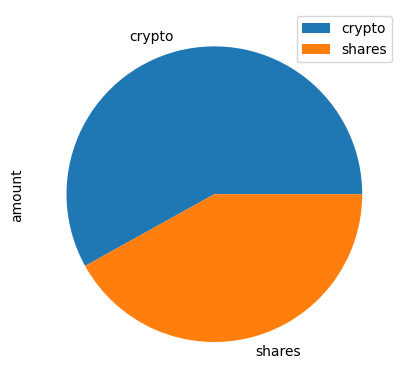

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y = "amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = df_savings.iloc[0].at["amount"] + df_savings.iloc[1].at["amount"]



# Validate saving health
if total_savings > emergency_fund:
    display("Congratulations! You have enough money in this fund")
elif total_savings == emergency_fund:
    display("Congratulations on reaching this financial goal")
elif total_savings < emergency_fund:
    display(f"you are {emergency_fund} - {total_savings} away from reach the goal")

'Congratulations! You have enough money in this fund'

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
    
).df


# Reorganize the DataFrame
# Separate ticker data
spy_data = df_stock_data[df_stock_data["symbol"] == "SPY"].drop("symbol", axis = 1)
agg_data = df_stock_data[df_stock_data["symbol"] == "AGG"].drop("symbol", axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([spy_data, agg_data], axis=1, keys = ["SPY","AGG"])


# Display sample data
df_stock_data

SPY                                     \
                            close    high    low trade_count    open   
timestamp                                                              
2020-08-07 04:00:00+00:00  334.57  334.88  332.3      349308  333.28   

                                                    AGG                   \
                             volume        vwap   close    high      low   
timestamp                                                                  
2020-08-07 04:00:00+00:00  57978084  333.809718  119.43  119.73  119.395   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00       15247  119.66  6229081  119.470433

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
 
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data

MC_stock_data.portfolio_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                                   AGG  \
                              volume        vwap daily_return    close   
timestamp                                                                
2016-05-02 04:00:00+00:00   64747229  207.305695          NaN  110.605   
2016-05-03 04:00:00+00:00  108050343  206.309997    -0.008707  110.810   
2016-05-04 04:00:00+00:00   94995641  205.086315    -0.005574  110.860   
2016-05-05 04:00:00+00:00   68425268  205.140615    -0.000195  111.140   
2016-05-06 04:00:00+00:00   90999800  204.943796     0.003659  110.970   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200       15122  110.74  3608552   
2016-05-03 04:00:00+00:00  110.9450  110.7500       15663  110.89  3128774   
2016-05-04 04:00:00+00:00  110.9315  110.7595       13984  110.91  3096337   
2016-05-05 04:00:00+00:00  111.1600  110.8010       15708  110.92  3052967   
2016-05-06 04:00:00+00:00  111.1200  110.9700       12697  111.12  2922700   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.626939          NaN  
2016-05-03 04:00:00+00:00  110.864495     0.001853  
2016-05-04 04:00:00+00:00  110.877983     0.000451  
2016-05-05 04:00:00+00:00  111.030002     0.002526  
2016-05-06 04:00:00+00:00  111.027631    -0.001530

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return() 


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993193,0.997182,1.000606,1.009667,0.998464,1.004714,0.991374,1.001057,1.000651,0.996843,...,0.997941,1.004266,0.998674,1.001503,1.002929,1.007761,1.001425,0.999528,1.003029,1.001837
2,0.997128,0.998329,0.999730,1.013857,0.998678,1.008609,0.995240,1.007416,1.002503,1.002080,...,0.994816,1.004672,0.996974,1.001600,1.004536,1.006792,1.006270,0.999247,1.004879,1.005488
3,1.001377,0.991633,0.997690,1.024698,0.997859,0.999524,0.991471,1.009169,1.004594,1.012791,...,0.992678,1.014789,1.006737,1.002288,1.010688,1.009903,1.014336,0.996504,1.000836,1.004319
4,1.004378,0.995746,1.005100,1.020639,1.001897,1.005629,0.991371,1.016599,1.005853,1.013448,...,1.001845,1.016070,1.002948,0.998788,1.008439,1.014752,1.018682,0.988572,1.004496,1.010088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.580594,7.393381,4.878021,5.492720,8.399595,5.735123,3.065501,11.267640,7.787473,14.804148,...,6.942948,4.770031,11.550635,8.239692,7.328820,5.782091,14.350022,6.193321,5.970016,5.062988
7557,6.564883,7.406701,4.893631,5.501129,8.413215,5.741912,3.051215,11.368423,7.777455,14.967884,...,6.919775,4.781941,11.547422,8.271862,7.277580,5.732295,14.207190,6.221312,5.900205,5.091690
7558,6.574980,7.430243,4.870055,5.557051,8.481367,5.757087,3.058730,11.340803,7.838073,14.877497,...,6.926094,4.814228,11.657393,8.254576,7.255976,5.686155,14.114694,6.170073,5.934165,5.069620
7559,6.560124,7.431478,4.914856,5.590400,8.472175,5.747870,3.071358,11.400628,7.843410,14.899484,...,6.920363,4.863900,11.731838,8.295235,7.244839,5.683130,14.092843,6.158777,5.903094,5.077953


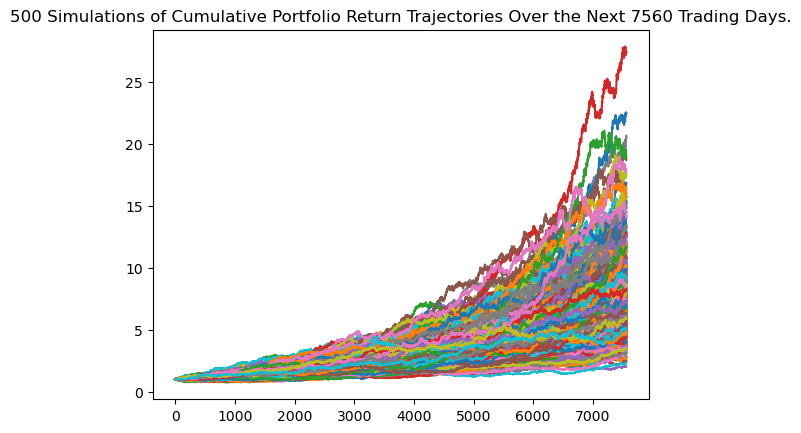

In [23]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

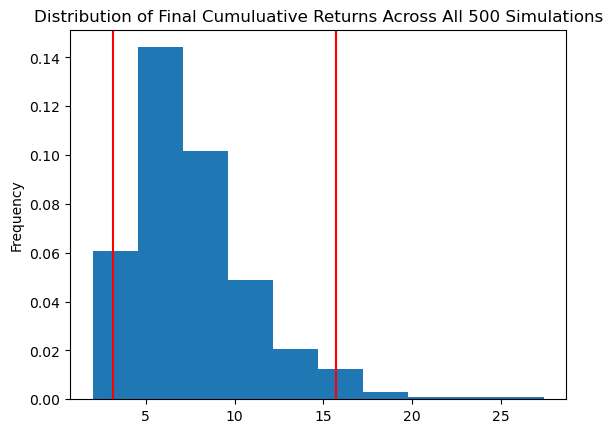

In [20]:
# Plot probability distribution and confidence intervals
MC_stock_data.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              7.614537
std               3.398024
min               2.022658
25%               5.246762
50%               6.920529
75%               9.256821
max              27.410211
95% CI Lower      3.145202
95% CI Upper     15.690254
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62904.03 and $313805.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $94356.05 and $470707.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")